# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

There is a clear positive correlation between City latitude and Max Temp in cities located in the southern hemisphere.


There is a clear negative correlation between City latitude and Max Temp in cities located in the northern hemisphere.


There is a light positive correlation between City latitude and humidity in cities located in the northern hemisphere.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime
from datetime import datetime
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [3]:
def checkIfDuplicates_1(listOfElems):

    if len(listOfElems) == len(set(listOfElems)):
        return False
    else:
        return True

In [4]:
result = checkIfDuplicates_1(cities)
 
if result:
    print('Yes, list contains duplicates')
else:
    print('No duplicates found in list')    

No duplicates found in list


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "metric"
query_url = f"{url}appid={weather_api_key}&units={unit}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=f81481f39318edd1c6ec8436f90fcf8f&units=metric&q='

In [6]:
city_with_temp = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

print("Beginning Data Retrieval")
print("-----------------------------")

for i,city in enumerate(cities):

    try:        
        response = requests.get(f"{query_url}{city}").json()    
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_with_temp.append(response["name"])
        
        print(f"Processing Record {i} | {cities[i]}")
    
    except:
    
        print(f"City not found. Skipping...")
        

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 1 | port elizabeth
Processing Record 2 | olafsvik
Processing Record 3 | hithadhoo
Processing Record 4 | east london
Processing Record 5 | dongsheng
Processing Record 6 | iqaluit
Processing Record 7 | nabire
Processing Record 8 | umm kaddadah
Processing Record 9 | souillac
Processing Record 10 | dobroye
Processing Record 11 | cape town
Processing Record 12 | new norfolk
Processing Record 13 | bluff
City not found. Skipping...
Processing Record 15 | avarua
Processing Record 16 | dikson
Processing Record 17 | atuona
City not found. Skipping...
Processing Record 19 | busselton
Processing Record 20 | albany
Processing Record 21 | pangnirtung
Processing Record 22 | la ronge
Processing Record 23 | bathsheba
Processing Record 24 | mataura
Processing Record 25 | peniche
Processing Record 26 | el silencio
Processing Record 27 | buala
Processing Record 28 | mujiayingzi
Processing Record 29 | paita

Processing Record 249 | igarka
Processing Record 250 | cordoba
Processing Record 251 | biak
Processing Record 252 | saint george
Processing Record 253 | uddevalla
Processing Record 254 | elk
Processing Record 255 | muli
City not found. Skipping...
Processing Record 257 | troitskoye
Processing Record 258 | andenes
Processing Record 259 | port blair
Processing Record 260 | kamenka
Processing Record 261 | buraydah
Processing Record 262 | naze
Processing Record 263 | richards bay
Processing Record 264 | nome
Processing Record 265 | youghal
Processing Record 266 | nelson bay
Processing Record 267 | ilulissat
Processing Record 268 | te anau
Processing Record 269 | kutum
Processing Record 270 | quimper
Processing Record 271 | tual
Processing Record 272 | slave lake
Processing Record 273 | kisangani
Processing Record 274 | douglas
Processing Record 275 | sitka
Processing Record 276 | bengkulu
Processing Record 277 | zyryanka
Processing Record 278 | tila
Processing Record 279 | leh
Processing R

Processing Record 501 | krasnyy chikoy
City not found. Skipping...
Processing Record 503 | dekar
Processing Record 504 | manggar
Processing Record 505 | bintulu
Processing Record 506 | necochea
Processing Record 507 | locri
Processing Record 508 | kiunga
City not found. Skipping...
Processing Record 510 | mana
Processing Record 511 | oussouye
Processing Record 512 | padang
Processing Record 513 | dzilam gonzalez
Processing Record 514 | nerang
Processing Record 515 | bilma
Processing Record 516 | mwinilunga
Processing Record 517 | river falls
Processing Record 518 | corinto
Processing Record 519 | karratha
Processing Record 520 | oudtshoorn
Processing Record 521 | miguel hidalgo
Processing Record 522 | itarantim
Processing Record 523 | puerto leguizamo
Processing Record 524 | manbij
Processing Record 525 | camargo
Processing Record 526 | kaoma
Processing Record 527 | sehithwa
Processing Record 528 | ulladulla
Processing Record 529 | morondava
Processing Record 530 | rio grande
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_data = pd.DataFrame({
    "City" : city_with_temp,
    "Cloudiness (%)": cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity (%)": humidity,
    "Latitude" : lat,
    "Longitude" : lng,
    "Max Temp (C°)" : max_temp,
    "Wind Speed (kmph)" : wind_speed  
}) 
weather_data.to_csv("weather_data.csv", index=False)
weather_data.count()

City                 552
Cloudiness (%)       552
Country              552
Date                 552
Humidity (%)         552
Latitude             552
Longitude            552
Max Temp (C°)        552
Wind Speed (kmph)    552
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [8]:
timestamp = weather_data["Date"][weather_data.index[-1]]
dt_object = datetime.fromtimestamp(timestamp)
time_format = dt_object.strftime("%d/%m/%y")

# Create directory

In [9]:
def weatherPlot (wc):
    plt.scatter(weather_data["Latitude"], weather_data[wc], color ="#0071bd", edgecolors="black")
    plt.title(f"City Latitude vs. {wc} ({time_format})")
    plt.xlabel('Latitude')
    plt.ylabel(wc)
    plt.grid()
    plt.savefig(f"graphs/Latitude vs. {wc}.png")
    return plt.show()

In [10]:
# x = datetime.datetime.now()
# print(f'{x.strftime("%d")}/{x.strftime("%m")}/{x.strftime("%y")}')

#### Latitude vs. Temperature Plot

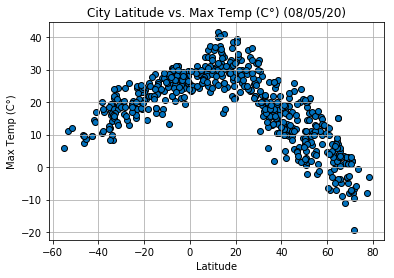

In [11]:
weatherPlot("Max Temp (C°)")

There seems to be a correlation between the latitude of the city and the temperature 

#### Latitude vs. Humidity

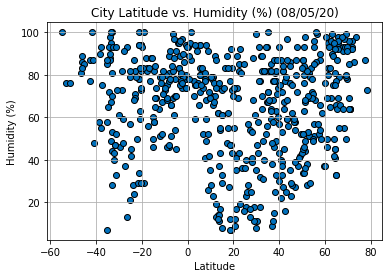

In [12]:
weatherPlot("Humidity (%)")

There doens't seems to be a correlation between the latitude of the city and the humidity 

#### Latitude vs. Cloudiness Plot

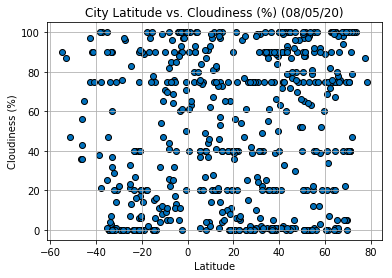

In [13]:
weatherPlot("Cloudiness (%)")

There doesn't seem to be a correlation between the latitude of the city and the cloudiness 

#### Latitude vs. Wind Speed Plot

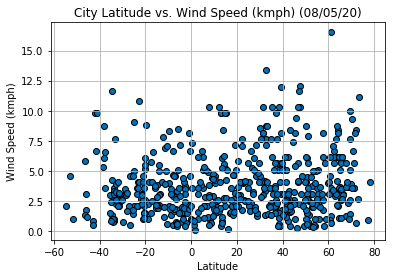

In [14]:
weatherPlot("Wind Speed (kmph)")

There doesn't seem to be a correlation between the latitude of the city and the wind speed 

## Linear Regression

In [33]:
# OPTIONAL: Create a function to create Linear Regression plots
def weatherRegressionNorth (wc):
    plt.scatter(northern_weather_data["Latitude"], northern_weather_data[wc], color ="#0071bd", edgecolors="black")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(northern_weather_data["Latitude"], northern_weather_data[wc])
    regress_values = northern_weather_data["Latitude"] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(northern_weather_data["Latitude"],regress_values,"r-")
    plt.annotate(line_eq,(northern_weather_data["Latitude"].min(),northern_weather_data[wc].min()),fontsize=15,color="red")
    plt.title(f"City Latitude vs. {wc} ({time_format})")
    plt.xlabel('Latitude')
    plt.ylabel(wc)
    plt.savefig(f"graphs/Northern Hemisphere - {wc} vs. Latitude Linear Regression.png")
    print(f"The r-squared is: {rvalue**2}")
    return plt.show()

In [34]:
def weatherRegressionSouth (wc):
    plt.scatter(southern_weather_data["Latitude"], southern_weather_data[wc], color ="#0071bd", edgecolors="black")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(southern_weather_data["Latitude"], southern_weather_data[wc])
    regress_values = southern_weather_data["Latitude"] * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(southern_weather_data["Latitude"],regress_values,"r-")
    plt.annotate(line_eq,(southern_weather_data["Latitude"].min(),southern_weather_data[wc].min()),fontsize=15,color="red")
    plt.title(f"City Latitude vs. {wc} ({time_format})")
    plt.xlabel('Latitude')
    plt.ylabel(wc)
    plt.savefig(f"graphs/Southern Hemisphere - {wc} vs. Latitude Linear Regression.png")
    print(f"The r-squared is: {rvalue**2}")
    return plt.show()

In [35]:
northern_weather_data = pd.DataFrame({})
southern_weather_data = pd.DataFrame({})
southern_weather_data = weather_data.loc[weather_data['Latitude'] < 0]
northern_weather_data = weather_data.loc[weather_data['Latitude'] > 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7522088175577919


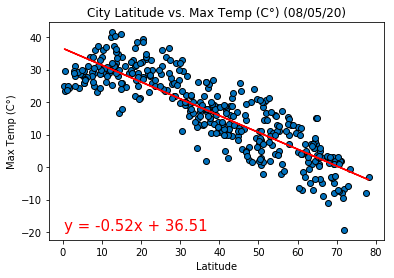

In [36]:
weatherRegressionNorth("Max Temp (C°)")

There is a negative correlation between City latitude and Max Temp in cities located in the northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6434125289994417


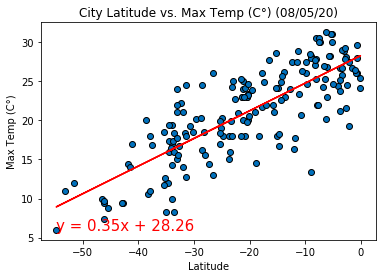

In [37]:
weatherRegressionSouth("Max Temp (C°)")

There is a positive correlation between City latitude and Max Temp in cities located in the southern hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03637888045850236


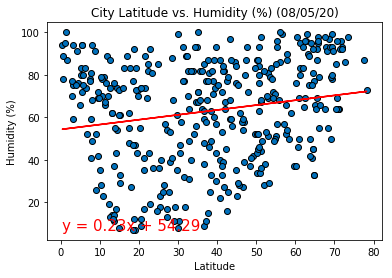

In [38]:
weatherRegressionNorth("Humidity (%)")

Apparently, there is not a correlation between City latitude and Humidity of cities located in the northern hemisphere. Maybe a slight correlation.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.007095277841801647


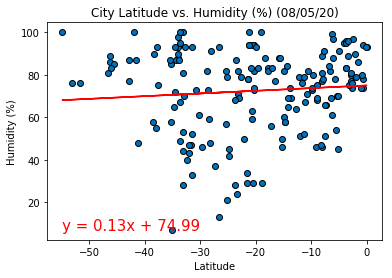

In [39]:
weatherRegressionSouth("Humidity (%)")

Apparently, there is not a correlation between City latitude and Humidity of cities located in the southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01442315339181358


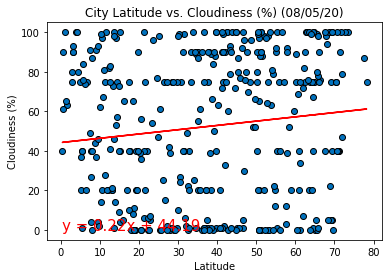

In [40]:
weatherRegressionNorth("Cloudiness (%)")

Apparently, there is no a correlation between City latitude and cloudiness of cities located in the northern hemisphere

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0322477522591748


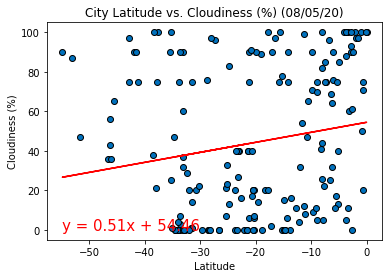

In [41]:
weatherRegressionSouth("Cloudiness (%)")

Apparently, there is no a correlation between City latitude and cloudiness of cities located in the southern hemisphere

####  Northern Hemisphere - Wind Speed (km/h) vs. Latitude Linear Regression

The r-squared is: 0.007911815798441456


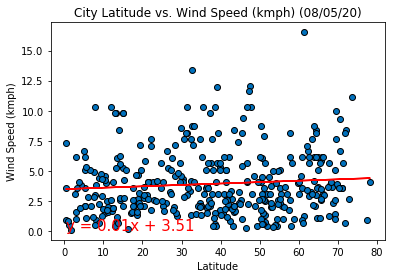

In [42]:
weatherRegressionNorth("Wind Speed (kmph)")

Apparently, there is no a correlation between City latitude and wind speed of cities located in the northern hemisphere

####  Southern Hemisphere - Wind Speed (km/h) vs. Latitude Linear Regression

The r-squared is: 0.005054262610915868


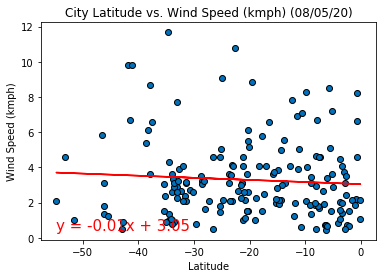

In [43]:
weatherRegressionSouth("Wind Speed (kmph)")

Apparently, there is no a correlation between City latitude and wind speed of cities located in the southern hemisphere